# Sampling from a bimodal normal distribution using Sequential Monte Carlo

This example shows how Sequential Monte Carlo can be used to sample from a bimodal normal distribution. If the object passed to Pints is not of type log_posterior - as here where a log_pdf is passed instead - then we assume independent uniform priors between -100 and 100, for each dimension.

In Sequential Monte Carlo, a series of tempered distributions are sampled from, whose density has the form,

$\beta \; \text{log} \; p(\theta|x) + (1-\beta) \; \text{log} \; p(\theta)$,

where $p(\theta|x)$ is the posterior and $p(\theta)$ is the prior, and $\beta\in(0,1]$ is a (inverse-)temperature parameter. By default, Pints uses a series of temperatures which are uniform on the log scale. Note that, when $\beta=1$, the density of the tempered distribution matches the posterior.

Show the distribution we aim to sample from.

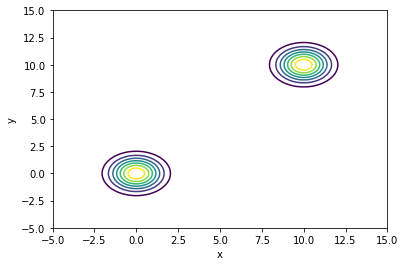

In [1]:
import os
os.chdir('../')
from __future__ import print_function
import pints
import pints.toy as toy
import pints.plot
import numpy as np
import matplotlib.pyplot as plt

# Create log pdf
log_pdf = pints.toy.MultimodalNormalLogPDF()

# Contour plot of pdf
levels = np.linspace(-3,12,20)
num_points = 100
x = np.linspace(-5, 15, num_points)
y = np.linspace(-5, 15, num_points)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
Z = np.exp([[log_pdf([i, j]) for i in x] for j in y])
plt.contour(X, Y, Z)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Sampling
Setup the sampler and run it.

In [2]:
# Select mean and variance matrix of initial proposal dist
x0 = [5, 5]
sigma0 = [[2, 0], [0,2]]

# Create mcmc routine
sampler = pints.SMC(log_pdf, x0, sigma0)

# Set number of temperatures (uniform on log scale)
sampler.set_temperature_schedule(5)

# Set number of particles
sampler.set_particles(5000)

# Set number of MCMC steps at each temperature
sampler.set_kernel_samples(3)

# Run sampler
samples = sampler.run()

AttributeError: 'SMC' object has no attribute 'set_log_rate'

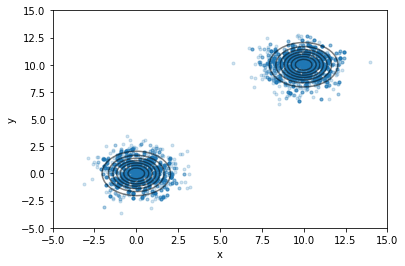

In [3]:
plt.contour(X, Y, Z, colors='k', alpha=0.5)
plt.scatter(samples[:,0], samples[:,1], marker='.', alpha=0.2)
plt.xlim(-5, 15)
plt.ylim(-5, 15)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Post estimation

Look at distribution of weights on final particles.

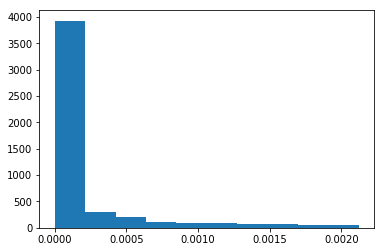

In [4]:
weights = sampler.weights()
plt.hist(weights)
plt.show()

Print the effective sample size based on the formula,

$ess = \frac{1}{\sum_{i=1}^k w_i^2},$

where $w_i$ is the weight of particule $i$.

In [5]:
print('ess = ', sampler.ess())

ess =  894.114214736
